# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$L(w) =  \frac{1}{n}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2$$

$$L(w) =  \frac{1}{n}(y -  xw) ^ 2 + \frac{1}{C}\sum_{j=1}^{D}w_j^2$$

$$L_1(w) =  \frac{1}{n}(y -  xw) ^ 2$$

$$\frac{\partial L_1(w)}{\partial w} = \frac{1}{n} * 2 (y -  xw) * \frac{\partial}{\partial w} (y -  xw) 
=  \frac{1}{n} * 2 (y -  xw) * (-x)$$

$$ w_{new} = w_{old} - \frac{2}{n} \sum x_i((x_i, w_{old}) - y_i) -\frac{2}{C}w_{old}$$

Если $(x_i, w_{old}) = y_i$, то мы почти не двигаемся, если они не равны то меняем веса в большую или меньшую сторону в зависимости от ошибки.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$L(w) = - \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2$$

$$L(w) = - \frac{1}{n}\left[\sum_i y_i \log \sigma(w,x) + ( 1 - y_i) \log (1 - \sigma(w,x)) \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2$$

$$L_1(w) = - \frac{1}{n}\left[\sum_i y_i \log \frac{1}{1 + \exp(-(x_i,w))} + ( 1 - y_i) \log (1 - \frac{1}{1 + \exp(-(x_i,w))}) \right] =
 \frac{1}{n}\left[\sum_i y_i \log \exp(-(x_i,w)) + \log (\frac{1 + \exp(-(x_i,w))}{\exp(-(x_i,w))}) \right] =$$
$$=  \frac{1}{n}\left[\sum_i -y_i (x_i,w) + \log (1 + \exp(x_i,w)) \right]$$

$$\frac{\partial L(w)}{\partial w} = \frac{1}{n} \sum_i\frac{x_i}{1 + \exp(-(x_i,w))} - x_iy_i +\frac{2}{C}w$$

$$ w_{new} = w_{old} - \frac{1}{n} \sum_i x_i(\sigma((x_i,w_{old})) - y_i) -\frac{2}{C}w_{old}$$

Этот градиент очень похож на градиент возникающий в задаче линейной регрессии, различия лишь в том, что берется $\sigma$ от $(x_i,w_{old})$ и нет коэффиуиента 2 перед одним из слагаемых

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] $$

$$\frac{\partial L(w)}{\partial w} = \frac{2}{N}X^T(Xw - y) = 0$$

$$\frac{\partial^{2} L(w)}{\partial w^{2}} = \frac{2}{N}(X^TX) = 0$$

<br>

$(X^TX)$- матрица Грама, она всегда положительно определена, поэтому Гессиан положетелен, следовательно $w = (X^TX)^{-1}X^TY $ точка минимума

<br>

$$\frac{\partial L(w)}{\partial w} = \frac{2}{n} \sum x_i((x_i, w) - y_i) +\frac{2}{C}w = 0$$

$$\frac{2}{n}(X^TX)w - \frac{2}{n}X^Ty + \frac{2}{C}w = 0$$

$$(\frac{1}{n}(X^TX)  + \frac{1}{C} I)w = \frac{1}{n}X^Ty$$

$$ w = (\frac{1}{n}(X^TX)  + \frac{1}{C} I)^{-1}\frac{1}{n}X^Ty $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$\frac{\partial E(L | x_i)}{\partial a(x_i)} =  \frac{-p(y_i = 1 |x_i )}{a(x_i)} +  \frac {p(y_i = 0 | x_i)}{1 - a(x_i)} = 0 $$

$$\frac{p(y_i = 1 |x_i )}{a(x_i)}  =  \frac {p(y_i = 0 | x_i)}{1 - a(x_i)} $$

$$ p(y_i = 1 |x_i )(1 - a(x_i)) =  p(y_i = 0 | x_i)a(x_i)$$

$$ p(y_i = 1 |x_i ) = a(x_i)(p(y_i = 1 |x_i ) + p(y_i = 0 | x_i)) $$

$$p(y_i = 1 |x_i ) = a(x_i)$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

$w_0$ позволило сторить разделяющие поверхности, не проходящие через начало координат, поэтому для регуляризации оно не нужно.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    length = len(y)
    ind = np.arange(length)
    if shuffle:
        np.random.shuffle(ind)
    for i in range(0, length, batch_size):
        if (length >= (i + batch_size)):
            X_batch = X[ind[i : i + batch_size]]
            y_batch = y[ind[i : i + batch_size]]
        else:
            X_batch = X[ind[i : length]]
            y_batch = y[ind[i : length]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [7]:
#%%pycodestyle

np.random.seed(0)


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    sigm_value_x = 1/(1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', batch=1, threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
      
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch = batch
        self.threshold = threshold
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = np.dot(X_batch, self.weights)
        if (self.model_type == 'lin_reg'):
            l_sum = np.sum((y_batch - a) ** 2)
            w_sum = np.sum(self.weights[1:] ** 2)
            loss = 1/X_batch.shape[0] * l_sum + 1/self.C * w_sum
        elif (self.model_type == 'log_reg'):
            l1 = y_batch * np.log(sigmoid(a))
            l2 = (1 - y_batch) * np.log(sigmoid(1 - a))
            w_sum = np.sum(self.weights[1:] ** 2)
            loss = - 1/X_batch.shape[0] * np.sum(l1 + l2) + 1/self.C * w_sum
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        ww = 2/self.C * self.weights
        a = np.dot(X_batch, self.weights)
        if (self.model_type == 'lin_reg'):
            l = np.dot((a - y_batch), X_batch)
            loss_grad = 2/X_batch.shape[0] * l + ww
        elif (self.model_type == 'log_reg'):
            l = np.dot((sigmoid(a) - y_batch),  X_batch)
            loss_grad = 1/X_batch.shape[0] * l + ww
        return loss_grad
    
    
    
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        w_0 = np.ones((X.shape[0], 1))
        X_0 = np.hstack((w_0, X))
        self.weights = np.random.uniform(low = -1, high = 1, size = X_0.shape[1])
        
        
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_0, y, batch_size=self.batch)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        w_0 = np.ones((X.shape[0], 1))
        X_0 = np.hstack((w_0, X))
        y_hat = np.dot(X_0, self.weights)
        if (self.model_type == 'lin_reg'):
            y_hat[np.where(y_hat >= self.threshold)] = 1
            y_hat[np.where(y_hat < self.threshold)] = 0
        elif (self.model_type == 'log_reg'):
            y_hat[np.where(sigmoid(y_hat) >= self.threshold)] = 1
            y_hat[np.where(sigmoid(y_hat) < self.threshold)] = 0
            
                            
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf, label):
    x = np.linspace(-6, 8, 2)
    y = x * (-clf.weights[1] / clf.weights[2]) + clf.weights[0]
    plt.plot(x, y, label=label)

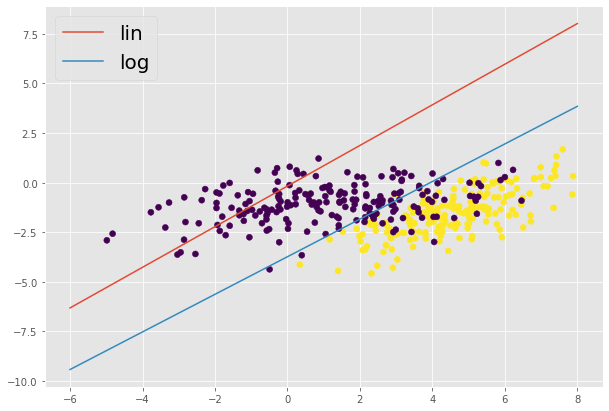

In [9]:
np.random.seed(0)

plt.figure(figsize=(10, 7))

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

lin_clf = MySGDClassifier(batch_generator, C=500, alpha=0.01,
                          max_epoch=100, model_type='lin_reg')
log_clf = MySGDClassifier(batch_generator, C=300, alpha=0.01,
                          max_epoch=100, model_type='log_reg')

lin_clf.fit(X, y)
log_clf.fit(X, y)

plot_decision_boundary(lin_clf, 'lin')
plot_decision_boundary(log_clf, 'log')

plt.legend(fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

7it [01:11, 10.23s/it]


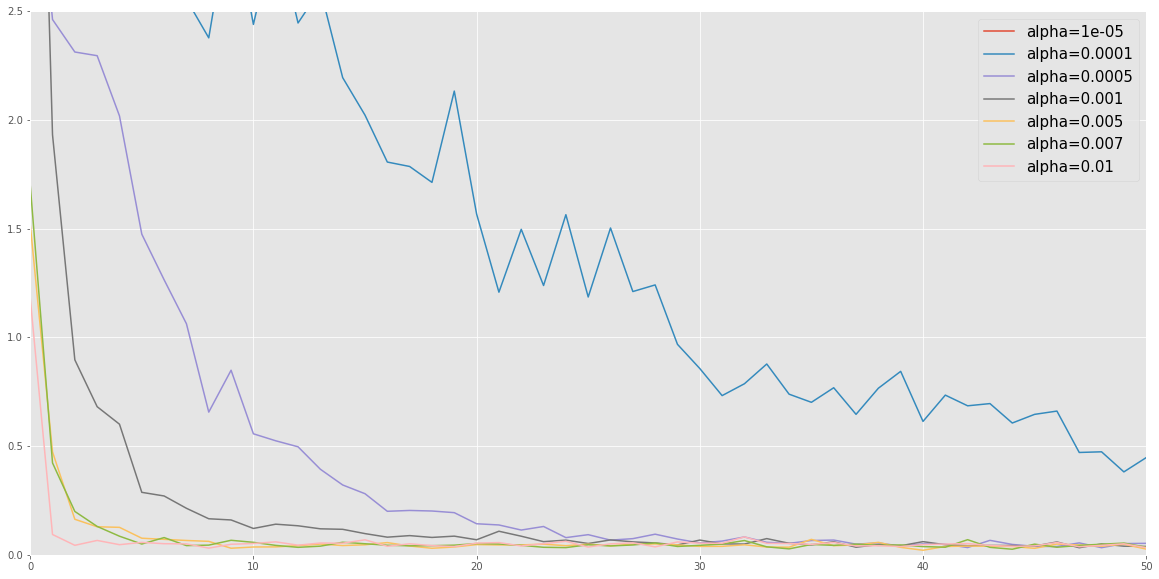

In [12]:
import tqdm
alpha = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.007, 0.01]
plt.figure(figsize=(20, 10))
plt.xlim(0, 50)
plt.ylim(0, 2.5)
N = 100
for i, alp in tqdm.tqdm(enumerate(alpha)):
    mean_loss = []
    clf = MySGDClassifier(batch_generator, C=100,
                          alpha=alp, model_type='lin_reg')
    clf.fit(X, y)
    for i in range(0, len(clf.errors_log['iter']), N):
        mean_loss.append(np.mean(clf.errors_log['loss'][i:i+N]))
    plt.plot(np.arange(len(mean_loss)),
             mean_loss, label='alpha={}'.format(alp))
plt.legend(fontsize=15)

7it [01:56, 16.69s/it]


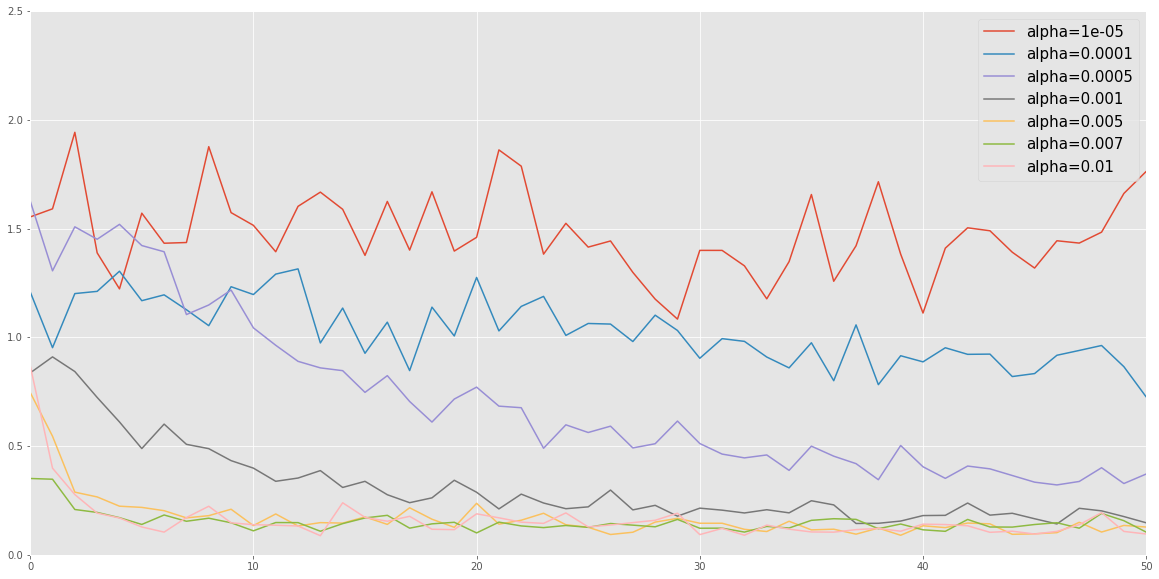

In [13]:
alpha = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.007, 0.01]
plt.figure(figsize=(20, 10))
plt.xlim(0, 50)
plt.ylim(0, 2.5)
N = 100
for i, alp in tqdm.tqdm(enumerate(alpha)):
    mean_loss = []
    clf = MySGDClassifier(batch_generator, C=100,
                          alpha=alp, model_type='log_reg')
    clf.fit(X, y)
    for i in range(0, len(clf.errors_log['iter']), N):
        mean_loss.append(np.mean(clf.errors_log['loss'][i:i+N]))
    plt.plot(np.arange(len(mean_loss)),
             mean_loss, label='alpha={}'.format(alp))
plt.legend(fontsize=15)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

При маленьких `alpha` регресии сходятся довольно медленно. Для лучшей сходимости стоит выбирать`alpha` из диапазона [0.005 - 0.01]

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

100%|███████████████████████████████████████████| 10/10 [04:42<00:00, 28.22s/it]


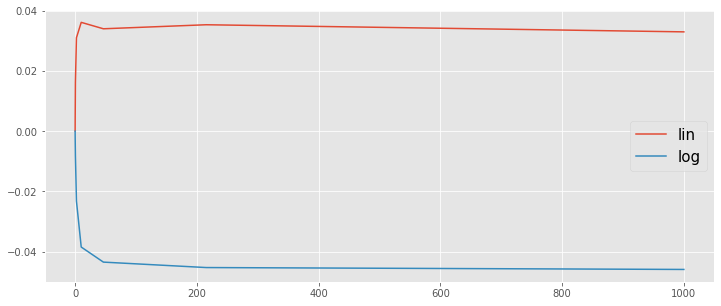

In [14]:
mean_lin = []
mean_log = []
for C in tqdm.tqdm(np.logspace(3, -3, 10)):
    clf_lin = MySGDClassifier(batch_generator, C=C,
                              alpha=0.0001, max_epoch=10, model_type='lin_reg')
    clf_log = MySGDClassifier(batch_generator, C=C,
                              alpha=0.0001, max_epoch=10, model_type='log_reg')
    clf_lin.fit(X, y)
    clf_log.fit(X, y)
    mean_lin.append(np.mean(clf_lin.weights))
    mean_log.append(np.mean(clf_log.weights))
plt.plot(np.logspace(3, -3, 10), mean_lin, label='lin')
plt.plot(np.logspace(3, -3, 10), mean_log, label='log')
plt.legend(fontsize=15)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 
Видно, что при большом штрафе среднее значение весов очень близко к 0

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [15]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [16]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [17]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [18]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [19]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [20]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
from sklearn.model_selection import train_test_split
trainX, X_valid, trainy, y_valid = train_test_split(X_train, y_train,
                                                    train_size=0.67,
                                                    random_state=42)

In [23]:
np.random.seed(3)

batches = [1, 5, 10, 50, 100]
lin_score = []
log_score = []

for i, bsize in tqdm.tqdm(enumerate(batches)):
    clf_lin = MySGDClassifier(batch_generator,
                              model_type='lin_reg', batch=bsize)
    clf_log = MySGDClassifier(batch_generator,
                              model_type='log_reg', batch=bsize)
    clf_lin.fit(trainX, trainy)
    clf_log.fit(trainX, trainy)
    lin_predict = clf_lin.predict(X_valid)
    log_predict = clf_log.predict(X_valid)
    lin_score.append(f1_score(y_valid, lin_predict))
    log_score.append(f1_score(y_valid, log_predict))

5it [00:03,  1.52it/s]


In [24]:
lin_batch = batches[np.argmax(lin_score)]
lin_batch

5

In [25]:
log_batch = batches[np.argmax(log_score)]
log_batch

10

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [26]:
np.random.seed(3)

lin_score = []
log_score = []
C_ar = [1, 100, 200, 300, 400, 500, 600]
for C in tqdm.tqdm(C_ar):
    clf_lin = MySGDClassifier(batch_generator, C=C,
                              model_type='lin_reg', batch=lin_batch)
    clf_log = MySGDClassifier(batch_generator, C=C,
                              model_type='log_reg', batch=log_batch)
    clf_lin.fit(trainX, trainy)
    clf_log.fit(trainX, trainy)
    lin_predict = clf_lin.predict(X_valid)
    log_predict = clf_log.predict(X_valid)
    lin_score.append(f1_score(y_valid, lin_predict))
    log_score.append(f1_score(y_valid, log_predict))

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


In [27]:
C_lin = C_ar[np.argmax(lin_score)]
C_lin

400

In [28]:
C_log = C_ar[np.argmax(log_score)]
C_log

1

In [29]:
np.random.seed(3)

lin_score = []
log_score = []
alpha = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.007, 0.01]
for alp in tqdm.tqdm(alpha):
    clf_lin = MySGDClassifier(batch_generator, C=C_lin, alpha=alp,
                              model_type='lin_reg', batch=lin_batch)
    clf_log = MySGDClassifier(batch_generator, C=C_log, alpha=alp,
                              model_type='log_reg', batch=log_batch)
    clf_lin.fit(trainX, trainy)
    clf_log.fit(trainX, trainy)
    lin_predict = clf_lin.predict(X_valid)
    log_predict = clf_log.predict(X_valid)
    lin_score.append(f1_score(y_valid, lin_predict))
    log_score.append(f1_score(y_valid, log_predict))

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


In [30]:
alpha_lin = alpha[np.argmax(lin_score)]
alpha_lin

0.01

In [31]:
alpha_log = alpha[np.argmax(log_score)]
alpha_log

0.01

In [32]:
np.random.seed(3)

lin_score = []
log_score = []
epoches = [5, 10, 30, 50, 100]
for epoch in tqdm.tqdm(epoches):
    clf_lin = MySGDClassifier(batch_generator, C=C_lin, alpha=alpha_lin,
                              max_epoch=epoch, model_type='lin_reg',
                              batch=lin_batch)
    clf_log = MySGDClassifier(batch_generator, C=C_log, alpha=alpha_log,
                              max_epoch=epoch, model_type='log_reg',
                              batch=log_batch)
    clf_lin.fit(trainX, trainy)
    clf_log.fit(trainX, trainy)
    lin_predict = clf_lin.predict(X_valid)
    log_predict = clf_log.predict(X_valid)
    lin_score.append(f1_score(y_valid, lin_predict))
    log_score.append(f1_score(y_valid, log_predict))

100%|█████████████████████████████████████████████| 5/5 [00:06<00:00,  1.37s/it]


In [33]:
epoch_lin = epoches[np.argmax(lin_score)]
epoch_lin

30

In [34]:
epoch_log = epoches[np.argmax(log_score)]
epoch_log

10

In [35]:
clf_lin = MySGDClassifier(batch_generator, C=C_lin, alpha=alpha_lin,
                          max_epoch=epoch_lin, model_type='lin_reg',
                          batch=lin_batch)
clf_lin.fit(trainX, trainy)
lin_predict = clf_lin.predict(X_valid)
f1_score(y_valid, lin_predict)

0.5754865860073645

In [36]:
clf_log = MySGDClassifier(batch_generator, C=C_log, alpha=alpha_log,
                          max_epoch=epoch_log, model_type='log_reg',
                          batch=log_batch)
clf_log.fit(trainX, trainy)
log_predict = clf_log.predict(X_valid)
f1_score(y_valid, log_predict)

0.6112687474665586

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [37]:
np.random.seed(3)

lin_score = []
log_score = []
thresholdes = [0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

for threshold in tqdm.tqdm(thresholdes):
    clf_log = MySGDClassifier(batch_generator, C=C_log,
                              alpha=alpha_log, max_epoch=epoch,
                              model_type='log_reg', batch=log_batch,
                              threshold=threshold)
    clf_log.fit(trainX, trainy)
    log_predict = clf_log.predict(X_valid)
    log_score.append(f1_score(y_valid, log_predict))

100%|█████████████████████████████████████████████| 8/8 [00:12<00:00,  1.53s/it]


In [38]:
threshold_log = thresholdes[np.argmax(log_score)]
threshold_log

0.5

In [39]:
clf_log = MySGDClassifier(batch_generator, C=C_log, alpha=alpha_log,
                          max_epoch=epoch_log, model_type='log_reg',
                          batch=log_batch, threshold=threshold_log)
clf_log.fit(trainX, trainy)
log_predict = clf_log.predict(X_valid)
f1_score(y_valid, log_predict)

0.6088379705400983

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

Alice Glushko

In [40]:
y_pred = clf_log.predict(X_test)

In [41]:
threshold_log
ind = pd.read_csv('sample_submission.csv')['pair_id']

In [42]:
import csv
with open("target.csv", mode="w", encoding='utf-8') as w_file:
    file_writer = csv.writer(w_file, delimiter=",", lineterminator="\r")
    file_writer.writerow(["pair_id", "target"])
    for i in range(len(ind)):
        file_writer.writerow([ind[i], int(y_pred[i])])

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Все хорошо!